In [27]:
# Import necessary libraries
from recsim.environments import long_term_satisfaction
import tensorflow as tf
import numpy as np

# Define the simulation environment
env_config = {'slate_size': 4,
              'seed': 0,
              'num_candidates': 15,
              'resample_documents': True}
env = long_term_satisfaction.create_environment(env_config)

# Define the neural network for estimating Q-values
num_features = env.observation_space['user'].shape[0]
num_actions = env.action_space.shape[0]

q_network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_actions)
])

# Define the optimizer and loss function for Q-values
q_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
q_loss_fn = tf.keras.losses.MeanSquaredError()

# Define the exploration function for NeuralUCB
exploration_fn = lambda mu, var, t: mu + np.sqrt(var) * np.sqrt(np.log(t) / (2 * t))

# Run simulation experiments
num_steps = 10000
num_episodes = 1000
rewardset = []
for i in range(num_episodes):
    obs = env.reset()
    done = False
    t = 0
    rewards = []

    while not done and t < num_steps:
        # Compute Q-values for all possible slates
        q_values = q_network(obs['user'][np.newaxis])

        # Choose the slate with the highest NeuralUCB score
        slate_scores = q_values.numpy().squeeze() + exploration_fn(0, 1, t)
        slate = np.argmax(slate_scores)

        # Take action and observe reward and next observation
        obs, reward, done, _ = env.step({0: slate})

        # Compute target Q-values and train Q-value network
        target_q_values = q_values.numpy().copy()
        target_q_values[0, slate] = reward
        with tf.GradientTape() as q_tape:
            q_preds = q_network(obs['user'][np.newaxis])
            q_loss = q_loss_fn(target_q_values, q_preds)
        q_gradients = q_tape.gradient(q_loss, q_network.trainable_variables)
        q_optimizer.apply_gradients(zip(q_gradients, q_network.trainable_variables))

        rewards.append(reward)
        t += 1

    print('Episode:', i, 'Total reward:', np.sum(rewards))
    rewardset.append(np.sum(rewards))



/tmp/ipykernel_137447/1545673130.py:28: RuntimeWarning: divide by zero encountered in log
  exploration_fn = lambda mu, var, t: mu + np.sqrt(var) * np.sqrt(np.log(t) / (2 * t))
/tmp/ipykernel_137447/1545673130.py:28: RuntimeWarning: invalid value encountered in sqrt
  exploration_fn = lambda mu, var, t: mu + np.sqrt(var) * np.sqrt(np.log(t) / (2 * t))


Episode: 0 Total reward: 723.3829286473737
Episode: 1 Total reward: 1152.719397485221
Episode: 2 Total reward: 776.6686253745055
Episode: 3 Total reward: 980.9278133662532
Episode: 4 Total reward: 966.5985714943334
Episode: 5 Total reward: 791.6311319920005
Episode: 6 Total reward: 891.2441361833554
Episode: 7 Total reward: 1091.5113313361476
Episode: 8 Total reward: 900.2971444917438
Episode: 9 Total reward: 1075.070069367419
Episode: 10 Total reward: 925.5297471665699
Episode: 11 Total reward: 1022.6825796098665
Episode: 12 Total reward: 941.761555956066
Episode: 13 Total reward: 757.3245830710332
Episode: 14 Total reward: 922.4457095629862
Episode: 15 Total reward: 817.2456971793026
Episode: 16 Total reward: 956.7833932116898
Episode: 17 Total reward: 737.7964157648822
Episode: 18 Total reward: 956.8595373756242
Episode: 19 Total reward: 1193.881467069847
Episode: 20 Total reward: 732.8319168047996
Episode: 21 Total reward: 841.4423285669473
Episode: 22 Total reward: 956.31620543622

Episode: 184 Total reward: 944.0061182531418
Episode: 185 Total reward: 1176.1970920977858
Episode: 186 Total reward: 1092.7748403001326
Episode: 187 Total reward: 1589.2537024387777
Episode: 188 Total reward: 881.697207138841
Episode: 189 Total reward: 830.0692923987899
Episode: 190 Total reward: 829.9768580462769
Episode: 191 Total reward: 786.4937254088242
Episode: 192 Total reward: 1025.6994859055208
Episode: 193 Total reward: 849.8615315781859
Episode: 194 Total reward: 884.0181229882658
Episode: 195 Total reward: 1093.5559206560156
Episode: 196 Total reward: 1285.2239954975184
Episode: 197 Total reward: 1155.8946666914214
Episode: 198 Total reward: 782.2168286366505
Episode: 199 Total reward: 837.4099393342105
Episode: 200 Total reward: 889.4301397615845
Episode: 201 Total reward: 930.2298454929598
Episode: 202 Total reward: 1224.9507092469494
Episode: 203 Total reward: 1010.2675801928207
Episode: 204 Total reward: 685.9836728161181
Episode: 205 Total reward: 1026.4515054627357
E

Episode: 366 Total reward: 720.564560458169
Episode: 367 Total reward: 1099.1754797688873
Episode: 368 Total reward: 803.4248497259895
Episode: 369 Total reward: 851.3960126975843
Episode: 370 Total reward: 803.5839896152515
Episode: 371 Total reward: 883.9047270748424
Episode: 372 Total reward: 938.9795068380171
Episode: 373 Total reward: 1071.888890677849
Episode: 374 Total reward: 1269.3376865329983
Episode: 375 Total reward: 1082.858581649079
Episode: 376 Total reward: 714.1351094775519
Episode: 377 Total reward: 854.3174206796422
Episode: 378 Total reward: 1047.7698148882084
Episode: 379 Total reward: 1137.5778896541735
Episode: 380 Total reward: 993.5945599600855
Episode: 381 Total reward: 933.9499085019326
Episode: 382 Total reward: 967.4467954470703
Episode: 383 Total reward: 889.2966411032479
Episode: 384 Total reward: 1145.964578794382
Episode: 385 Total reward: 876.8965520477477
Episode: 386 Total reward: 789.9723446284324
Episode: 387 Total reward: 749.7410811664508
Episode

Episode: 548 Total reward: 1080.1375771559246
Episode: 549 Total reward: 899.5257032310734
Episode: 550 Total reward: 842.9701574319462
Episode: 551 Total reward: 808.6222519082523
Episode: 552 Total reward: 784.1011629814066
Episode: 553 Total reward: 769.4757716336975
Episode: 554 Total reward: 1028.6058501345035
Episode: 555 Total reward: 759.4431332331744
Episode: 556 Total reward: 684.5730691440866
Episode: 557 Total reward: 1354.085361116523
Episode: 558 Total reward: 913.6969110819394
Episode: 559 Total reward: 981.3417695942136
Episode: 560 Total reward: 870.2183951871938
Episode: 561 Total reward: 741.6721482133262
Episode: 562 Total reward: 656.0752317907522
Episode: 563 Total reward: 1289.8110944778737
Episode: 564 Total reward: 979.6897992491336
Episode: 565 Total reward: 930.483607354506
Episode: 566 Total reward: 680.3316159009569
Episode: 567 Total reward: 981.2447096610429
Episode: 568 Total reward: 802.9729625764639
Episode: 569 Total reward: 937.7932292265559
Episode:

Episode: 730 Total reward: 844.7866029801924
Episode: 731 Total reward: 753.927588961911
Episode: 732 Total reward: 781.995584597923
Episode: 733 Total reward: 916.9060127924448
Episode: 734 Total reward: 1151.339093894308
Episode: 735 Total reward: 840.3874265003093
Episode: 736 Total reward: 1212.616960900411
Episode: 737 Total reward: 810.9649625539266
Episode: 738 Total reward: 700.5439609731609
Episode: 739 Total reward: 1004.3124469642926
Episode: 740 Total reward: 1071.0571900220568
Episode: 741 Total reward: 839.081517829006
Episode: 742 Total reward: 850.052751979452
Episode: 743 Total reward: 871.883842066625
Episode: 744 Total reward: 864.0003847868576
Episode: 745 Total reward: 840.0988993634132
Episode: 746 Total reward: 990.2116488116669
Episode: 747 Total reward: 906.6780176618374
Episode: 748 Total reward: 767.5649069306485
Episode: 749 Total reward: 1090.1339542997143
Episode: 750 Total reward: 1142.801812846759
Episode: 751 Total reward: 1170.2261723445065
Episode: 75

Episode: 912 Total reward: 947.2231526826881
Episode: 913 Total reward: 855.0404405594876
Episode: 914 Total reward: 787.1085475531416
Episode: 915 Total reward: 977.041962475507
Episode: 916 Total reward: 867.2575884799803
Episode: 917 Total reward: 953.3107440604207
Episode: 918 Total reward: 1149.3461959314698
Episode: 919 Total reward: 1118.0265514588036
Episode: 920 Total reward: 1038.373105229686
Episode: 921 Total reward: 898.0510236114559
Episode: 922 Total reward: 867.9098910243125
Episode: 923 Total reward: 777.0371287519603
Episode: 924 Total reward: 730.8046071077048
Episode: 925 Total reward: 1025.0806722545456
Episode: 926 Total reward: 602.1834744022793
Episode: 927 Total reward: 878.4322907958054
Episode: 928 Total reward: 1088.7787356675356
Episode: 929 Total reward: 812.6440450934736
Episode: 930 Total reward: 964.9251809763355
Episode: 931 Total reward: 1013.2820337309764
Episode: 932 Total reward: 965.455606595404
Episode: 933 Total reward: 879.97448903618
Episode: 

In [37]:
rewardset2 = []
for i in range(num_episodes):
    obs = env.reset()
    done = False
    t = 0
    rewards = []

    while not done and t < num_steps:
        # Compute Q-values for all possible slates
        q_values = q_network(obs['user'][np.newaxis])

        # Choose the slate with the highest NeuralUCB score
        # slate_scores = q_values.numpy().squeeze() + exploration_fn(0, 1, t)
        # slate = np.argmax(slate_scores)
        slate = [0,1,2,3]
        # Take action and observe reward and next observation
        obs, reward, done, _ = env.step({0: slate})

        # Compute target Q-values and train Q-value network
        target_q_values = q_values.numpy().copy()
        target_q_values[0, slate] = reward
        with tf.GradientTape() as q_tape:
            q_preds = q_network(obs['user'][np.newaxis])
            q_loss = q_loss_fn(target_q_values, q_preds)
        q_gradients = q_tape.gradient(q_loss, q_network.trainable_variables)
        q_optimizer.apply_gradients(zip(q_gradients, q_network.trainable_variables))

        rewards.append(reward)
        t += 1

    print('Episode:', i, 'Total reward:', np.sum(rewards))
    rewardset2.append(np.sum(rewards))

Episode: 0 Total reward: 1096.4294909421772
Episode: 1 Total reward: 1052.3892463378265
Episode: 2 Total reward: 1014.3526009998704
Episode: 3 Total reward: 887.6203747500208
Episode: 4 Total reward: 955.7249710651628
Episode: 5 Total reward: 884.2208459963576
Episode: 6 Total reward: 728.6783081465119
Episode: 7 Total reward: 1149.1316748327797
Episode: 8 Total reward: 981.0711531020223
Episode: 9 Total reward: 703.4836858965931
Episode: 10 Total reward: 944.9031073133889
Episode: 11 Total reward: 965.1796165037503
Episode: 12 Total reward: 920.6719100841689
Episode: 13 Total reward: 976.6372437839643
Episode: 14 Total reward: 1006.2969221316714
Episode: 15 Total reward: 758.8715082213012
Episode: 16 Total reward: 850.6967651842522
Episode: 17 Total reward: 1532.9455288144432
Episode: 18 Total reward: 855.1007426807164
Episode: 19 Total reward: 691.8751092828002
Episode: 20 Total reward: 1129.3277827022207
Episode: 21 Total reward: 912.5242657510535
Episode: 22 Total reward: 982.55506

Episode: 184 Total reward: 904.6901023749241
Episode: 185 Total reward: 766.0468361646097
Episode: 186 Total reward: 1153.9622548733412
Episode: 187 Total reward: 1164.3834984486593
Episode: 188 Total reward: 1070.3930534944916
Episode: 189 Total reward: 788.8515535290028
Episode: 190 Total reward: 852.2411525884709
Episode: 191 Total reward: 764.6204487357387
Episode: 192 Total reward: 833.7768116377235
Episode: 193 Total reward: 1110.550764764339
Episode: 194 Total reward: 873.2458810343926
Episode: 195 Total reward: 995.5703360220241
Episode: 196 Total reward: 1168.7546932843343
Episode: 197 Total reward: 1115.3399789929617
Episode: 198 Total reward: 862.1806463563428
Episode: 199 Total reward: 723.5145329754727
Episode: 200 Total reward: 634.221933860007
Episode: 201 Total reward: 804.7738518052096
Episode: 202 Total reward: 1175.0093359936373
Episode: 203 Total reward: 921.7343700544654
Episode: 204 Total reward: 985.4222084561146
Episode: 205 Total reward: 862.2663895503518
Episo

Episode: 366 Total reward: 842.5787428801009
Episode: 367 Total reward: 810.7819039155436
Episode: 368 Total reward: 749.5524864278963
Episode: 369 Total reward: 1064.9949958799373
Episode: 370 Total reward: 876.8825447357494
Episode: 371 Total reward: 1013.7707066156739
Episode: 372 Total reward: 972.9186934592796
Episode: 373 Total reward: 894.2823530989059
Episode: 374 Total reward: 1078.8441704839945
Episode: 375 Total reward: 883.7860988917945
Episode: 376 Total reward: 1388.7893740349764
Episode: 377 Total reward: 973.662026218373
Episode: 378 Total reward: 910.453920493798
Episode: 379 Total reward: 970.2389658091954
Episode: 380 Total reward: 809.6579205824121
Episode: 381 Total reward: 1043.5179463012432
Episode: 382 Total reward: 1058.0487574598035
Episode: 383 Total reward: 808.1504038526061
Episode: 384 Total reward: 832.487058389843
Episode: 385 Total reward: 925.8888855853077
Episode: 386 Total reward: 1061.7312094912527
Episode: 387 Total reward: 909.8013672810259
Episod

Episode: 548 Total reward: 966.5540401412575
Episode: 549 Total reward: 995.0356049129688
Episode: 550 Total reward: 1206.6452815492903
Episode: 551 Total reward: 980.7850422430935
Episode: 552 Total reward: 1071.3228003028653
Episode: 553 Total reward: 964.0785870117945
Episode: 554 Total reward: 902.269787293246
Episode: 555 Total reward: 886.7983451650709
Episode: 556 Total reward: 926.0705603420828
Episode: 557 Total reward: 1082.83416493375
Episode: 558 Total reward: 1151.4105129014636
Episode: 559 Total reward: 744.4779427525037
Episode: 560 Total reward: 1106.1923861765126
Episode: 561 Total reward: 1011.6553439432489
Episode: 562 Total reward: 1086.2697273816557
Episode: 563 Total reward: 986.5517400297365
Episode: 564 Total reward: 811.8337026486773
Episode: 565 Total reward: 893.6315782940848
Episode: 566 Total reward: 1144.6926019891196
Episode: 567 Total reward: 926.2253846587398
Episode: 568 Total reward: 1053.8458221150838
Episode: 569 Total reward: 783.8273871219994
Epis

Episode: 730 Total reward: 1397.4634448145168
Episode: 731 Total reward: 915.790716399875
Episode: 732 Total reward: 867.0489361862668
Episode: 733 Total reward: 880.5356216073482
Episode: 734 Total reward: 1315.6784122725294
Episode: 735 Total reward: 865.3872358249417
Episode: 736 Total reward: 925.5139400741206
Episode: 737 Total reward: 913.6452933477665
Episode: 738 Total reward: 941.5619631024933
Episode: 739 Total reward: 745.4629328050428
Episode: 740 Total reward: 968.1725301299483
Episode: 741 Total reward: 974.7352059361465
Episode: 742 Total reward: 933.0256052644532
Episode: 743 Total reward: 850.2604835425411
Episode: 744 Total reward: 900.3941966096563
Episode: 745 Total reward: 896.192922908725
Episode: 746 Total reward: 841.977172214236
Episode: 747 Total reward: 1218.1875558329975
Episode: 748 Total reward: 907.1668164320203
Episode: 749 Total reward: 788.711836163469
Episode: 750 Total reward: 758.590224484695
Episode: 751 Total reward: 863.1503798144064
Episode: 752

Episode: 912 Total reward: 931.3384279363237
Episode: 913 Total reward: 1207.6252651264917
Episode: 914 Total reward: 641.799708728996
Episode: 915 Total reward: 999.5199739841745
Episode: 916 Total reward: 1028.3342190237797
Episode: 917 Total reward: 972.3203582878149
Episode: 918 Total reward: 862.4505394126645
Episode: 919 Total reward: 1004.6003033760255
Episode: 920 Total reward: 663.8215591805128
Episode: 921 Total reward: 802.4930101638747
Episode: 922 Total reward: 708.3438325520843
Episode: 923 Total reward: 783.075361019712
Episode: 924 Total reward: 971.9876385046726
Episode: 925 Total reward: 933.5074397613304
Episode: 926 Total reward: 949.6326940161958
Episode: 927 Total reward: 832.1060486037319
Episode: 928 Total reward: 870.5638726450138
Episode: 929 Total reward: 724.2382573406062
Episode: 930 Total reward: 672.5848412934871
Episode: 931 Total reward: 1113.4601927551407
Episode: 932 Total reward: 849.6746214427767
Episode: 933 Total reward: 747.7194375935555
Episode:

In [38]:
window_size = 100
i = 0
rewardset_averages = []

while i < len(rewardset) - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = rewardset[i : i + window_size]
  
    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    rewardset_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  

In [39]:
window_size = 100
i = 0
rewardset2_averages = []

while i < len(rewardset2) - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = rewardset2[i : i + window_size]
  
    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    rewardset2_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  

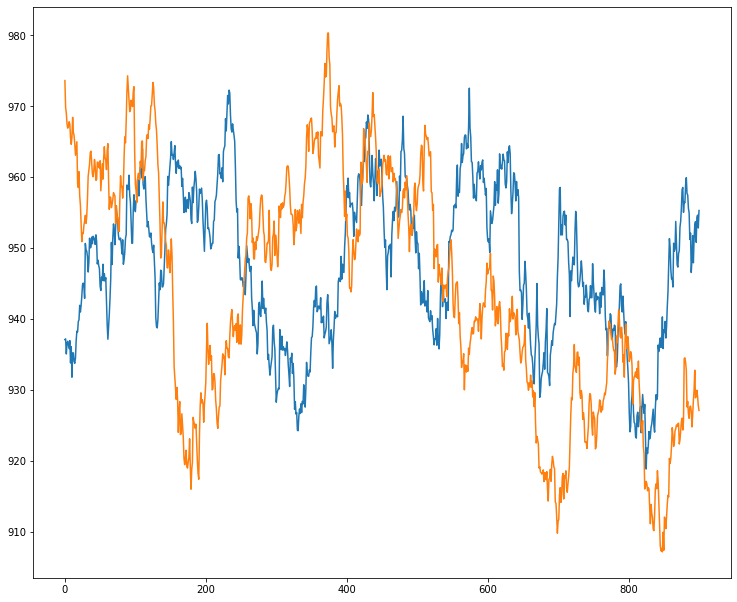

In [40]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12.50, 10.50]

#plt.plot(rewardset)
#plt.plot(rewardset2)
plt.plot(rewardset_averages)
plt.plot(rewardset2_averages)
plt.show()